# Quantum Simulation of Tunneling through an Eckart Barrier

In [2]:
from walsh_evolution import *
import sys
sys.path.insert(0, './../classical/')
from classical_evolution import *
from math import floor, log10, isinf
normalize = lambda x: x / np.linalg.norm(x)
def round_sf(x, sig_figs):
    if isinf(x): return np.inf
    return round(x, -int(floor(log10(abs(x/10**(sig_figs - 1))))))


## Eckart Barrier Example

In [2]:
# n = 7
# N = 2**n
# L = 5
# x_grid = np.linspace(-5, 5, N)
# repeats = 10
# plot_grid = np.arange(-L, L, 2*L/(N*repeats))
# potential = lambda x: 100/np.cosh(x/.5)
# a = wft(potential, n, x_grid)
# approx = iwft(a, n, terms_kept=19)
# plt.plot(x_grid, potential(x_grid), label='analytic')
# plt.plot(plot_grid, np.repeat(approx, repeats))
# plt.show()


In [3]:
# T = .5
# K = 25
# x0 = -3.0  # Initial position
# p0 = 15.0  # Initial momentum
# sigma = 0.5
# def eckart_initial_wave_function(x):
#     val = np.exp(-(x - x0)**2 / (2 * sigma**2) + 1j*p0*(x - x0))
#     return normalize(val)

# # states, t_grid, x_grid = walsh_evolve_2(potential, eckart_initial_wave_function, n, L, K, T)
# states, t_grid, x_grid = walsh_evolve_quantum_2(potential, eckart_initial_wave_function, n, L, K, T)

# amplitudes = np.abs(states)**2
# plot_time_evolution(amplitudes, t_grid, x_grid, interpolate_plot=True)


## Quadratic Potential Example

working on iwft: 100%|██████████| 128/128 [00:00<00:00, 31788.20it/s]

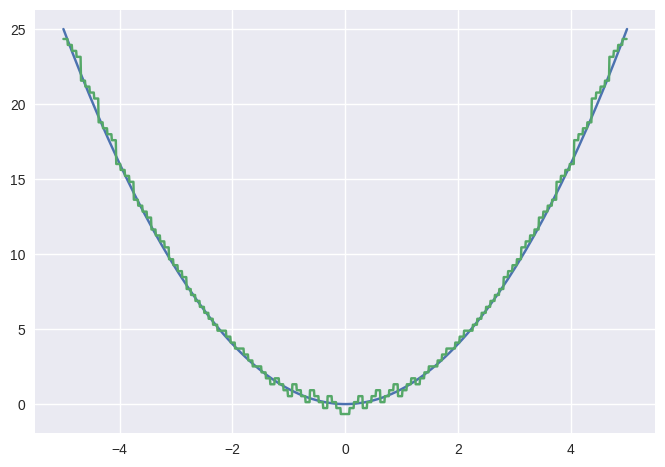

In [3]:
n = 7
N = 2**n
L = 5
x_grid = np.linspace(-5, 5, N)
repeats = 10
plot_grid = np.arange(-L, L, 2*L/(N*repeats))
potential = lambda x: x**2
a = wft(potential, n, x_grid)
approx = iwft(a, n, terms_kept=12)
plt.plot(x_grid, potential(x_grid), label='analytic')
plt.plot(plot_grid, np.repeat(approx, repeats))
plt.show()


In [5]:
# T = .5
# K = 25
# dt = T/K
# x_grid = np.linspace(-5, 5, 100)
# t_grid = np.arange(0, T, dt)
# true_sol = lambda x, t: normalize(1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t))
# initial_wave_function = lambda x: true_sol(x, 0)

# states, t_grid, x_grid = walsh_evolve_quantum_2(potential, initial_wave_function, n, L, K, T)
# amplitudes = np.abs(states)**2
# plot_time_evolution(amplitudes, t_grid, x_grid, interpolate_plot=False)


In [6]:
# potential = lambda x: x**2
# true_sol = lambda x, t: normalize(1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t))
# initial_wave_function = lambda x: true_sol(x, 0)
# n, K = 6, 50
# T = .5
# L = 8

# states1, t_grid1, x_grid1 = walsh_evolve_quantum_1(potential, initial_wave_function, n, L, K, T, D=1)
# states2, t_grid2, x_grid2 = walsh_evolve_quantum_2(potential, initial_wave_function, n, L, K, T, D=1)

# error1 = []
# error2 = []
# for i in range(K + 1):
#     error1.append(np.linalg.norm(np.abs(states1[i, :])**2 - np.abs(true_sol(x_grid1, t_grid1[i]))**2)/np.linalg.norm(np.abs(true_sol(x_grid1, t_grid1[i]))**2))
#     error2.append(np.linalg.norm(np.abs(states2[i, :])**2 - np.abs(true_sol(x_grid2, t_grid1[i]))**2)/np.linalg.norm(np.abs(true_sol(x_grid2, t_grid2[i]))**2))

# plt.semilogy(t_grid1, error1, label='First Order')
# plt.semilogy(t_grid2, error2, label='Second Order')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('Relative Error')
# plt.ylim(1e-8, 1e-1)
# plt.show()


In [7]:
# true_sol = lambda x, t: normalize(1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t))
# initial_wave_function = lambda x: true_sol(x, 0)
# T = .5
# L = 8
# n = 6
# k_vals = [10, 20, 30, 40, 50]
# error1, error2 = [], []
# i = 0


# for k in k_vals:
#     states1, t_grid1, x_grid1 = walsh_evolve_quantum_1(potential, initial_wave_function, n, L, k, T, D=1)
#     states2, t_grid2, x_grid2 = walsh_evolve_quantum_2(potential, initial_wave_function, n, L, k, T, D=1)
#     error1.append(np.linalg.norm(np.abs(states1[-1, :])**2 - np.abs(true_sol(x_grid1, t_grid1[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid1, t_grid1[-1]))**2))
#     error2.append(np.linalg.norm(np.abs(states2[-1, :])**2 - np.abs(true_sol(x_grid2, t_grid2[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid2, t_grid2[-1]))**2))

# plt.loglog(k_vals, error1, base=2, label='First Order')
# plt.loglog(k_vals, error2, base=2, label='Second Order')
# plt.legend()
# plt.xlabel('Number of Time Steps')
# plt.ylabel('Relative Error')
# plt.title('Comparing to True Solution')
# plt.show()


# Testing Gate Counts

In [8]:
true_sol = lambda x, t: normalize(1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t))
initial_wave_function = lambda x: true_sol(x, 0)
potential = lambda x: x**2
n = 7
L = 5
T = 2
terms_kept = 64
desired_errors = [2**-i for i in range(8)]
gate_counts_1 = []
gate_counts_2 = []
increment = 1

K1 = 0
K2 = 0
error1 = np.inf
error2 = np.inf
progress = tqdm()
for desired_error in desired_errors:
    while error1 > desired_error:
        K1 += increment
        progress.set_description(f'Desired error {desired_error}; Testing K1 = {K1}; previous error {round_sf(error1, 5)}')
        states1, t_grid1, x_grid1 = walsh_evolve_1(potential, initial_wave_function, n, L, K1, T, D=1, verbose=False, terms_kept=terms_kept)
        error1 = np.linalg.norm(np.abs(states1[-1, :])**2 - np.abs(true_sol(x_grid1, t_grid1[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid1, t_grid1[-1]))**2)
        progress.update(1)
    gates1 = walsh_evolve_quantum_1(potential, initial_wave_function, n, L, K1, T, D=1, verbose=False, terms_kept=terms_kept, gate_count_only=True)
    count1 = 0
    for gate in gates1.keys():
        count1 += gates1[gate]
    gate_counts_1.append(count1)

    while error2 > desired_error:
        K2 += increment
        progress.set_description(f'Desired error {desired_error}; Testing K2 = {K2}; previous error {round_sf(error2, 5)}')
        states2, t_grid2, x_grid2 = walsh_evolve_2(potential, initial_wave_function, n, L, K2, T, D=1, verbose=False, terms_kept=terms_kept)
        error2 = np.linalg.norm(np.abs(states2[-1, :])**2 - np.abs(true_sol(x_grid2, t_grid2[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid2, t_grid2[-1]))**2)
        progress.update(1)
    gates2 = walsh_evolve_quantum_2(potential, initial_wave_function, n, L, K2, T, D=1, verbose=False, terms_kept=terms_kept, gate_count_only=True)
    count2 = 0
    for gate in gates2.keys():
        count2 += gates2[gate]
    gate_counts_2.append(count2)
progress.close()


Desired error 0.0078125; Testing K2 = 20; previous error 0.0081262: : 340it [00:37,  9.17it/s] 


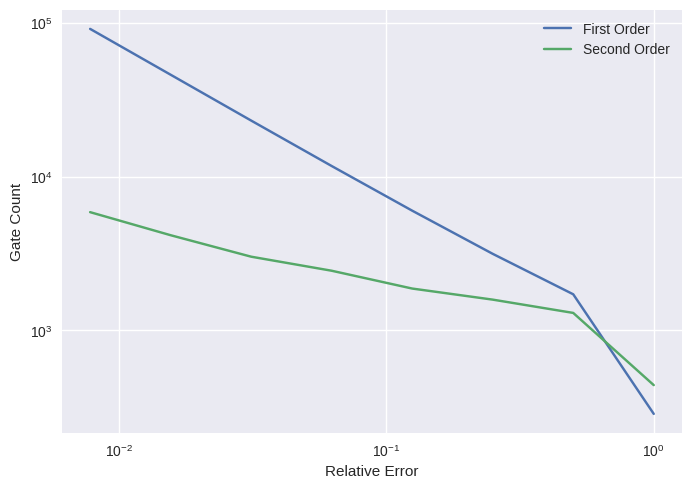

In [9]:
plt.loglog(desired_errors, gate_counts_1, label='First Order', base=2)
plt.loglog(desired_errors, gate_counts_2, label='Second Order')
plt.legend()
plt.xlabel('Relative Error')
plt.ylabel('Gate Count')
plt.show()


In [12]:
true_sol = lambda x, t: normalize(1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t))
initial_wave_function = lambda x: true_sol(x, 0)
potential = lambda x: x**2
n = 7
L = 5
T = 2
terms_kept = 64
errors_1 = []
errors_2 = []
gate_counts_1 = []
gate_counts_2 = []

K_vals = [4**i for i in range(6)]
progress = tqdm(total=len(K_vals)*2)
for K in K_vals:
    states1, t_grid1, x_grid1 = walsh_evolve_1(potential, initial_wave_function, n, L, K, T, D=1, verbose=False, terms_kept=terms_kept)
    error1 = np.linalg.norm(np.abs(states1[-1, :])**2 - np.abs(true_sol(x_grid1, t_grid1[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid1, t_grid1[-1]))**2)
    gates1 = walsh_evolve_quantum_1(potential, initial_wave_function, n, L, K, T, D=1, verbose=False, terms_kept=terms_kept, gate_count_only=True)
    count1 = 0
    for gate in gates1.keys():
        count1 += gates1[gate]
    errors_1.append(error1)
    gate_counts_1.append(count1)
    progress.update(1)

    states2, t_grid2, x_grid2 = walsh_evolve_2(potential, initial_wave_function, n, L, K, T, D=1, verbose=False, terms_kept=terms_kept)
    error2 = np.linalg.norm(np.abs(states2[-1, :])**2 - np.abs(true_sol(x_grid2, t_grid2[-1]))**2)/np.linalg.norm(np.abs(true_sol(x_grid2, t_grid2[-1]))**2)
    gates2 = walsh_evolve_quantum_2(potential, initial_wave_function, n, L, K, T, D=1, verbose=False, terms_kept=terms_kept, gate_count_only=True)
    count2 = 0
    for gate in gates2.keys():
        count2 += gates2[gate]
    errors_2.append(error2)
    gate_counts_2.append(count2)
    progress.update(1)
progress.close()


100%|██████████| 12/12 [00:54<00:00,  4.56s/it]


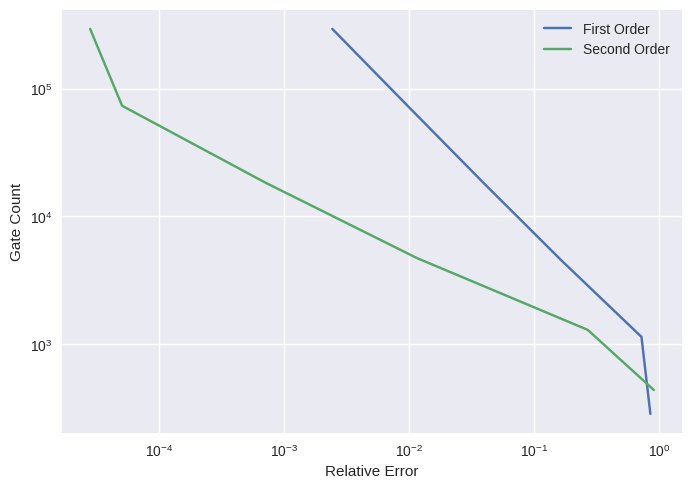

In [13]:
plt.loglog(errors_1, gate_counts_1, label='First Order')
plt.loglog(errors_2, gate_counts_2, label='Second Order')
plt.legend()
plt.xlabel('Relative Error')
plt.ylabel('Gate Count')
plt.show()
